# Bayesian Bootstrapping

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

## Generate some data

In [2]:
mu = 2.7
sigma = 1.1
n = 100
nboot = 250
x = np.random.normal(mu, sigma, size=n)

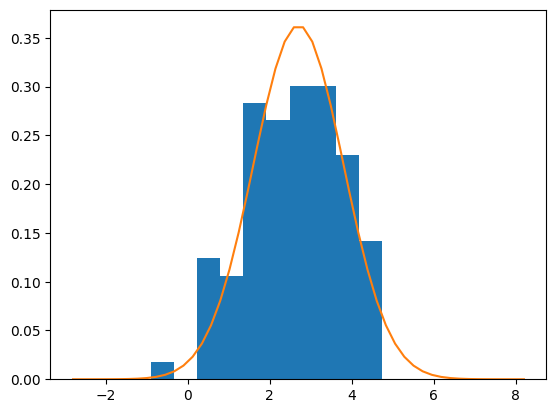

In [3]:
plt.hist(x, density=1)

xr = np.linspace(mu - 5 * sigma, mu + 5 * sigma)
plt.plot(xr, stats.norm.pdf(xr, mu, sigma))

## Classical non-parametric bootstrap

In [4]:
boot_mu = np.zeros(nboot)
boot_sig = np.zeros(nboot)
for i in range(nboot):
    boot_sample = np.random.choice(x, size=n, replace=True)
    boot_mu[i] = boot_sample.mean()
    boot_sig[i] = boot_sample.std()

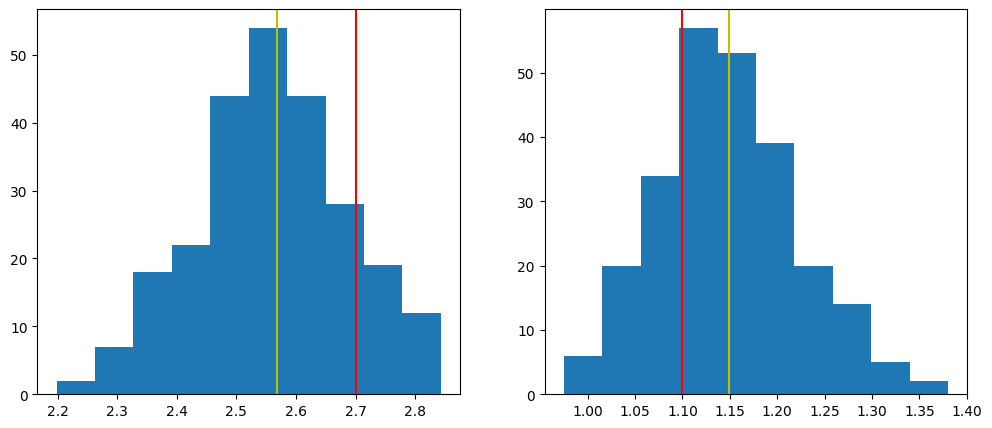

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(boot_mu)
ax[0].axvline(mu, c="r")
ax[0].axvline(x.mean(), c="y")
ax[1].hist(boot_sig)
ax[1].axvline(sigma, c="r")
ax[1].axvline(x.std(), c="y")

# Rewriting bootstrap with multinomial weights

An alternate way of doing non-parametric bootstrap is writing the number of times each data point $x_i$ appears in the bootstrap resample. The distribution of the number of times is given by the multinomial distribution (which models $n$ independent trials, each of which leads to a success for exactly one of $k$ categories. Here $n$ is the number of items in the resample and $k$ is the number of items in $x$). Then we can use multinomial values as weights for a resample with replacement.

In [6]:
multinomial_weights = (
    np.random.multinomial(n, pvals=np.repeat(1 / n, n), size=nboot) / n
)

In [8]:
boot_multi_mu = np.zeros(nboot)
boot_multi_sig = np.zeros(nboot)

for i in range(nboot):
    resample = np.random.choice(x, size=n, replace=True, p=multinomial_weights[i])
    boot_multi_mu[i] = resample.mean()
    boot_multi_sig[i] = resample.std()

boot_multi_mu_alt = multinomial_weights @ x
boot_multi_sig_alt = np.sqrt(
    multinomial_weights @ x**2 - (multinomial_weights @ x) ** 2
)

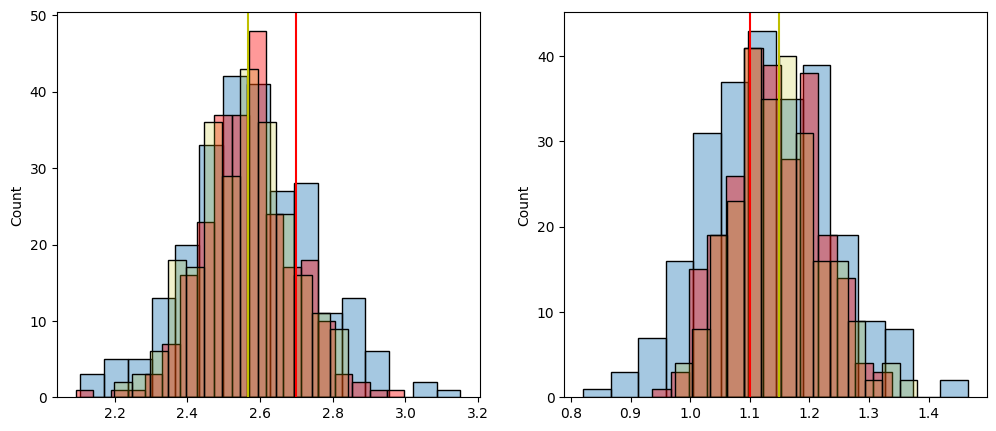

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(boot_multi_mu, ax=ax[0], alpha=0.4)
sns.histplot(boot_multi_mu_alt, ax=ax[0], color="r", alpha=0.4)
sns.histplot(boot_mu, ax=ax[0], color="y", alpha=0.2)
ax[0].axvline(mu, c="r")
ax[0].axvline(x.mean(), c="y")
sns.histplot(boot_multi_sig, ax=ax[1], alpha=0.4)
sns.histplot(boot_multi_sig_alt, ax=ax[1], color="r", alpha=0.4)
sns.histplot(boot_sig, ax=ax[1], color="y", alpha=0.2)
ax[1].axvline(sigma, c="r")
ax[1].axvline(x.std(), c="y")

## Bayesian bootstrapping

This is the same thing as the multinomial interpretation, but now we replace the multinomial with a Dirichlet. This is essentially replacing the discrete weights with continuous ones, so we end up with a smoother bootstrap distribution.

In [10]:
dirichlet_weights = np.random.dirichlet(np.ones(n), size=nboot)

In [11]:
boot_bayes_mu = np.zeros(nboot)
boot_bayes_sig = np.zeros(nboot)

for i in range(nboot):
    resample = np.random.choice(x, size=nboot, replace=True, p=dirichlet_weights[i])
    boot_bayes_mu[i] = resample.mean()
    boot_bayes_sig[i] = resample.std()

boot_bayes_mu_alt = dirichlet_weights @ x
boot_bayes_sig_alt = np.sqrt(dirichlet_weights @ x**2 - (dirichlet_weights @ x) ** 2)

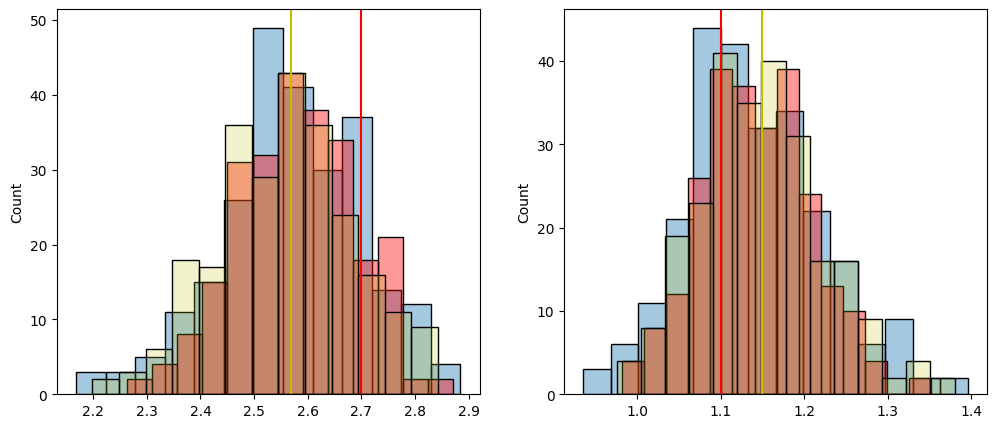

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(boot_bayes_mu, ax=ax[0], alpha=0.4)
sns.histplot(boot_bayes_mu_alt, ax=ax[0], color="r", alpha=0.4)
sns.histplot(boot_mu, ax=ax[0], color="y", alpha=0.2)
ax[0].axvline(mu, c="r")
ax[0].axvline(x.mean(), c="y")
sns.histplot(boot_bayes_sig, ax=ax[1], alpha=0.4)
sns.histplot(boot_bayes_sig_alt, ax=ax[1], color="r", alpha=0.4)
sns.histplot(boot_sig, ax=ax[1], color="y", alpha=0.2)
ax[1].axvline(sigma, c="r")
ax[1].axvline(x.std(), c="y")